# Rainbows Python Project 

This was the final project for my 'Scientific Programming in Python' module in year 1 of university. It involved calculating minimum deviation angles for certain incident angles to plot how a rainbow (and a secondary rainbow) would form. 

I scored 94% on this project.

##  Relevant Equations
The refractive index of water can be defined as,

$$ n_{f,w} = {c\over{v}} \qquad\mathrm{[1]} $$

where, 
* $n_{f,w}$ is the refractive index of water depending on the frequency of light
* $c$ is the speed of light, [$ms^{-1}$] 
* $v$ is the speed of the wave at frequency f in water, [$ms^{-1}$]

With Snell's Law, the ratio of 2 refractive indexes can be expressed as a function of their incident and refracted angles,

$$ {sin(\alpha)\over sin(\beta)} = {n_{f,w}\over n_{f,a}} \qquad\mathrm{[2]} $$

where,
* $\alpha$ is the incident angle, [degrees]
* $\beta$ is the refracted angle, [degrees]
* $n_{f,w}$ is the refractive index of water depending on the frequency of light
* $n_{f,a}$ is the refractive index of air depending on the frequency of light

Using the relation defined in eq[2], the deviation angle of light that reflects once inside a water droplet can be expressed as,

$$ D_f(\alpha) = 180^o + 2\alpha - 4\beta \qquad\mathrm{[3]} $$

where,
* $\alpha$ is the incident angle, [degrees]
* $\beta$ is the refracted angle, [degrees]
* $D_f(\alpha)$ is the deviation angle, [degrees]

Beta can be expressed as a function of alpha using eq[2], substituting it into eq[3] gives,

$$ D_f(\alpha) = 180^o + 2\alpha - 4\left(arcsin{sin\alpha \over n_{f,w}} \right) \qquad\mathrm{[4]} $$

The minimum deviation angle will occur when the derivative of eq[4] = 0. At this point, the incident angle when the deviation angle is at a minimum can be found,

$$ cos(\alpha) = \sqrt{{1\over{3}}(n^2 -1)} \qquad\mathrm{[5]} $$

the incident angle can then be used in eq[3] to find the minimum deviation angle for a primary bow.

For a secondary bow, light will reflect twice inside of a water droplet, so the deviation angle will be:

$$ D_f(\alpha) = 360^o + 2\alpha - 6\beta \qquad\mathrm{[6]} $$

Beta can be substituted in, like in the primary bow equations,

$$ D_f(\alpha) = 360^o + 2\alpha - 6\left(arcsin{sin\alpha \over n_{f,w}} \right) \qquad\mathrm{[7]} $$

The same method for finding the minimum deviation angle for a primary bow can be used to find an equation representing the incident angle causing the minimum deviation angle for a secondary bow,

$$ cos(\alpha) = \sqrt{{1\over{8}}(n^2 -1)} \qquad\mathrm{[8]} $$

the incident angle can then be used in eq[5] to find the minimum deviation angle for a secondary bow.

## Main Code

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib.widgets import Slider, Button

### Refractive Index Dictionary
Relates different colours of the rainbow to water's corresponding refractive indexes.

In [2]:
# Red, orange, yellow, green, blue, indigo, violet
# Create a dictionary containing the refractive indexes, data from: http://www.philiplaven.com/p20.html
colour_ns = {'red':1.33141, 'orange':1.33393, 'yellow':1.33472, 'green':1.33659, 'blue':1.34055, 'indigo':1.34235, 'violet':1.34451,}
colour_ns
# Use colour_ns.get('colour') to find the refrcactive index for that colour.

{'red': 1.33141,
 'orange': 1.33393,
 'yellow': 1.33472,
 'green': 1.33659,
 'blue': 1.34055,
 'indigo': 1.34235,
 'violet': 1.34451}

### Functions

In [3]:
# Used when plotting a rainbow
def circle(x,r):
    """Finds the y value from the equation of a circle: x^2 + y^2 = r^2"""
    y = (r**2 - x**2)**0.5
    return y

### Classes

In [4]:
class Rainbow():
    """A class to to store information for forming rainbows."""
    
     # Initialise attributes
    def __init__(self, alpha=0, nfw=0):
        """Initialise attributes alpha (Incident Angle) and nfw (Refractive Index)."""
        self.alpha = alpha
        self.nfw = nfw
        
    # Function to return the values of alpha and nfw as a string
    def __repr__(self):
        """Returns a string with the values of alpha (Incident Angle) and nfw (Refractive Index)
        associated with the object."""
        return f'({self.alpha},{self.nfw})'
    
    # Functions
    def dev_angle(self):
        """Calculates the deviation angle of a ray of light with a certain frequency f
        passing from air to a spherical water droplet. Using eq[4].
        Alpha = Incident Angle
        nfw = Refractive Index of water for a frequency f"""
        D = 180 + 2*self.alpha - np.degrees(4*np.arcsin(np.sin(np.radians(self.alpha))/self.nfw))
        return D
    
    def dev_max(self):
        """Caclulates the value of alpha from eq[5] and uses it to calculate the minimum deviation angle from eq[4].
        Returns (incident angle, minimum deviation angle)"""
        inc = np.degrees(np.arccos((1/3*(self.nfw**2-1))**0.5))
        dev = 180 + 2*inc - np.degrees(4*np.arcsin(np.sin(np.radians(inc))/self.nfw))
        return inc, dev

In [5]:
class SecondRainbow(Rainbow):
    """A class to store information for forming secondary rainbows."""
    
    # Initialise attributes
    def __init__(self, alpha=0, nfw=0):
        """initialise attributes alpha (Incident Angle) and nfw (Refractive Index)."""
        Rainbow.__init__(self, alpha, nfw)
        
    # Function to return the values of alpha and nfw as a string
    def __repr__(self):
        """Returns a string of the incident angle and refractive index associated with the object."""
        return f'Incident Angle = {self.alpha}, Refractive Index = {self.nfw}'
    
    # Functions
    def dev2_angle(self):
        """Calculates the second deviation angle of a ray of light with frequency f 
        that reflects internally twice in a spherical raindrop. Using eq[6].
        Alpha = Incident Angle
        nfw = Refractive index of water for a frequency f"""
        D = 360 + 2*self.alpha - np.degrees(6*np.arcsin(np.sin(np.radians(self.alpha))/self.nfw))
        return D

    def dev2_max(self):
        """Calculates the value of alpha from eq[8] and uses it to find the minimum deviation angle from eq[7].
        Returns (incident angle, minimum deviation angle)"""
        inc = np.degrees(np.arccos((1/8*(self.nfw**2-1))**0.5))
        dev2 = 360 + 2*inc - np.degrees(6*np.arcsin(np.sin(np.radians(inc))/self.nfw))
        return inc, dev2

#### Testing the classes

In [6]:
# Using the Rainbow class to create a test object with an incident angle of 45 degrees and a refractive index of 1.33141
test = Rainbow(45,1.33141)
# Testing the function to find the deviation angle
f'Deviation angle = {test.dev_angle()} degrees'

'Deviation angle = 141.68179970669587 degrees'

In [7]:
# Testing the function to find the minimum deviation angle
f'Incident Angle = {test.dev_max()[0]} degrees, min deviation angle = {test.dev_max()[1]} degrees'

'Incident Angle = 59.50290392668728 degrees, min deviation angle = 137.69011030178328 degrees'

In [8]:
# Testing the functions of the SecondRainbow class by creating an object 
# with an incident angle of 45 degrees and a refractive index of 1.33141
test2 = SecondRainbow(45,1.33141)
# Testing the function to find the deviation angle when light is reflected twice inside the water droplet
f'Deviation angle = {test2.dev2_angle()} degrees'

'Deviation angle = 257.5226995600438 degrees'

In [9]:
# Testing the function to find the minimum deviation angle, for when light is reflected twice inside the water droplet
f'Incident angle = {test2.dev2_max()[0]} degrees, min deviation angle = {test2.dev2_max()[1]} degrees'

'Incident angle = 71.8940123504836 degrees, min deviation angle = 230.4731018579816 degrees'

### Graphs using the class and for loop

In [10]:
xs = np.linspace(0,90,91) # Creating a set of x-values to use with the plots

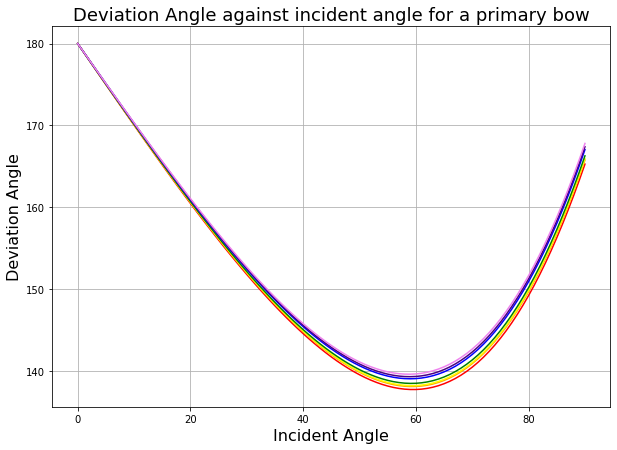

In [11]:
# Making the figure
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()
ax.grid(visible=True)
ax.set_title('Deviation Angle against incident angle for a primary bow', fontsize=18)
ax.set_xlabel('Incident Angle', fontsize='16')
ax.set_ylabel('Deviation Angle', fontsize='16')

# Plotting the deviation angles against the incident angles (xs) between 0 and 90 degrees
for i in colour_ns:
    ax.plot(xs, Rainbow(xs,colour_ns.get(i)).dev_angle(), color=i)

In [12]:
# Finding the deviation angle for each colour in a primary bow
print(f'Incident angle for all the deviations =', Rainbow(0,colour_ns.get('red')).dev_max()[0], 'degrees')
for i in colour_ns:
    print(f'Deviation angle for {i} =', Rainbow(0,colour_ns.get(i)).dev_max()[1], 'degrees')
# This agrees with what can be seen on the graph above

Incident angle for all the deviations = 59.50290392668728 degrees
Deviation angle for red = 137.69011030178328 degrees
Deviation angle for orange = 138.0569405149203 degrees
Deviation angle for yellow = 138.17135690656193 degrees
Deviation angle for green = 138.441091886021 degrees
Deviation angle for blue = 139.00724409317465 degrees
Deviation angle for indigo = 139.2623422141957 degrees
Deviation angle for violet = 139.5666295991789 degrees


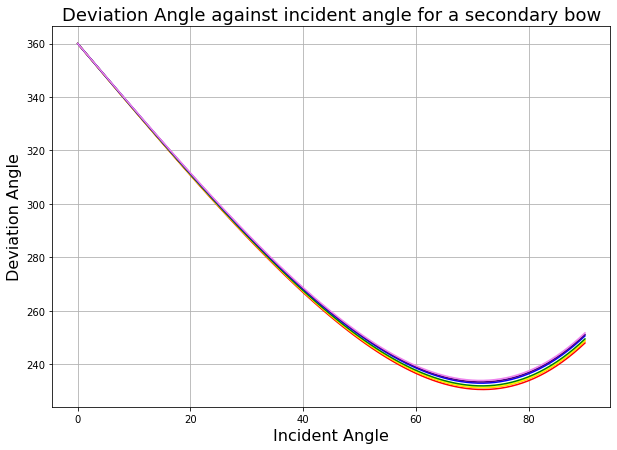

In [13]:
# Making the figure
fig2 = plt.figure(figsize=(10,7))
ax2 = fig2.add_subplot()
ax2.grid(visible=True)
ax2.set_title('Deviation Angle against incident angle for a secondary bow', fontsize=18)
ax2.set_xlabel('Incident Angle', fontsize='16')
ax2.set_ylabel('Deviation Angle', fontsize='16')

# Plotting the deviation angles (when the light is reflected twice) against the incident angles (xs) between 0 and 90 degrees
for i in colour_ns:
    ax2.plot(xs, SecondRainbow(xs, colour_ns.get(i)).dev2_angle(), color=i)

In [14]:
# Finding the deviation angle for each colour in a secondary bow
print(f'Incident angle for all the deviations =', SecondRainbow(0,colour_ns.get('red')).dev2_max()[0], 'degrees')
for i in colour_ns:
    print(f'Deviation angle for {i} =', SecondRainbow(0,colour_ns.get(i)).dev2_max()[1], 'degrees')
# This agrees with what can be seen on the graph above

Incident angle for all the deviations = 71.8940123504836 degrees
Deviation angle for red = 230.4731018579816 degrees
Deviation angle for orange = 231.13423213070524 degrees
Deviation angle for yellow = 231.34058428808282 degrees
Deviation angle for green = 231.8273262839832 degrees
Deviation angle for blue = 232.8502068971183 degrees
Deviation angle for indigo = 233.31165939728828 degrees
Deviation angle for violet = 233.8625539834295 degrees


### Plotting a rainbow

In [15]:
x_circle = np.linspace(-180,180,361) # Set of x-values to use in the plot with the circle function

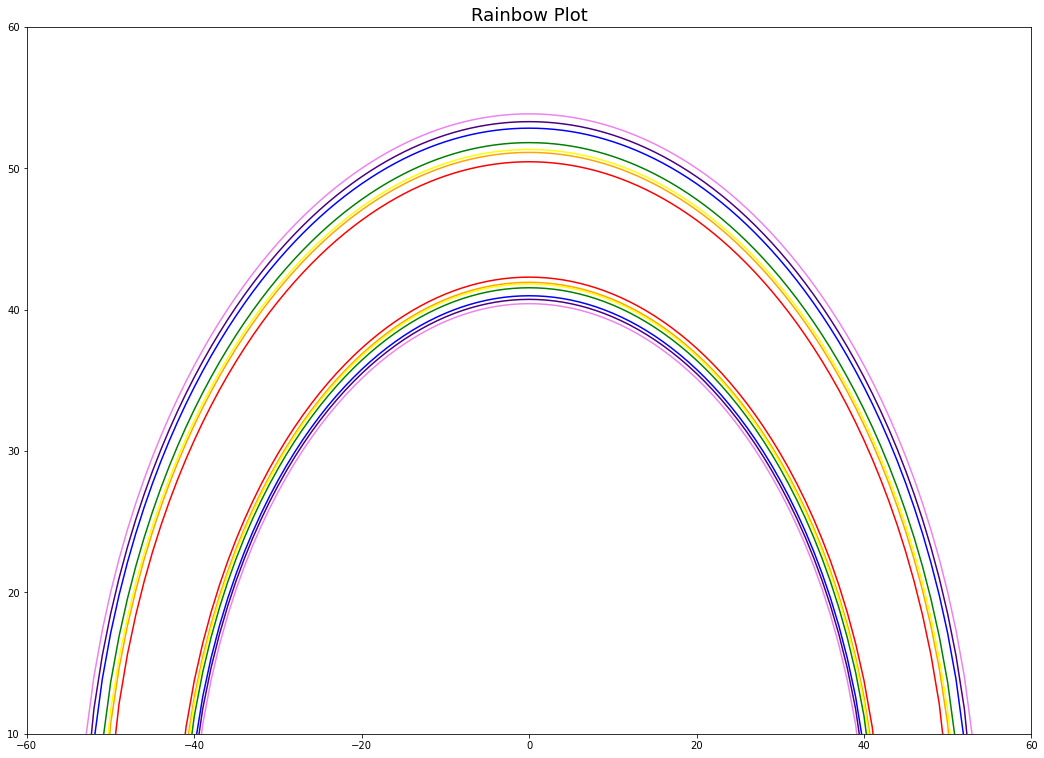

In [16]:
# Making the figure
fig3 = plt.figure(figsize=(18,13))
ax3 = fig3.add_subplot()
ax3.set_title('Rainbow Plot', fontsize=18)
ax3.set_xlim(-60,60)
ax3.set_ylim(10,60)
# filterwarnings will remove the runtimewarnings given when the code tries to divide by 0.
warnings.filterwarnings("ignore", category=RuntimeWarning)
# The deviation angles calculated before can be used to find the radius of each of the coloured bows.
# Plotting the primary bow
for i in colour_ns:
        ax3.plot(x_circle, circle(x_circle, 180-Rainbow(0,colour_ns.get(i)).dev_max()[1]), color=i)
# Plotting the secondary bow
for i in colour_ns:
        ax3.plot(x_circle, circle(x_circle, SecondRainbow(0,colour_ns.get(i)).dev2_max()[1]-180), color=i)

### Changing Refractive Index with temperature
The refractive index of water changes depending on temperature and pressure, if the pressure is a constant, how does the temperature effect the incident and deviation angles required to form a rainbow?

In [17]:
# Importing a text file with data relating the refractive index of water with temperature and pressure
# Link to the paper: https://aip.scitation.org/doi/pdf/10.1063/1.555743
datafile = 'Nw_with_temp.txt'
data = np.genfromtxt(datafile, skip_header=5, delimiter=',', unpack=True)
data

array([[ 0.     , 10.     , 20.     , 30.     , 40.     , 50.     ,
        60.     , 70.     , 80.     , 90.     ,  0.     , 10.     ,
        20.     , 30.     , 40.     , 50.     , 60.     , 70.     ,
        80.     , 90.     ,  0.     , 10.     , 20.     , 30.     ,
        40.     , 50.     , 60.     , 70.     , 80.     , 90.     ],
       [ 1.34359,  1.34351,  1.34287,  1.3418 ,  1.34039,  1.33867,
         1.3367 ,  1.33447,  1.33204,  1.32942,  1.33346,  1.33341,
         1.33283,  1.33184,  1.33052,  1.32892,  1.32707,  1.325  ,
         1.32274,  1.32029,  1.33086,  1.33073,  1.33007,  1.32903,
         1.32766,  1.32603,  1.32417,  1.32209,  1.31983,  1.31739]])

In [18]:
# Separating the data into temporary lists
t_temp, n_temp = data

In [19]:
# Sorting the data into lists by slicing the temporary lists.
# List of temperatures from 0-90 degrees celcius
t1 = t_temp[:10] 
t2 = t_temp[10:20]
t3 = t_temp[20:]
# List of corresponding refractive indexes for 3 different wavelength of light for each temperature.
n1 = n_temp[:10] # Violet Light
n2 = n_temp[10:20] # Yellow Light
n3 = n_temp[20:] # Red Light

<IPython.core.display.Javascript object>


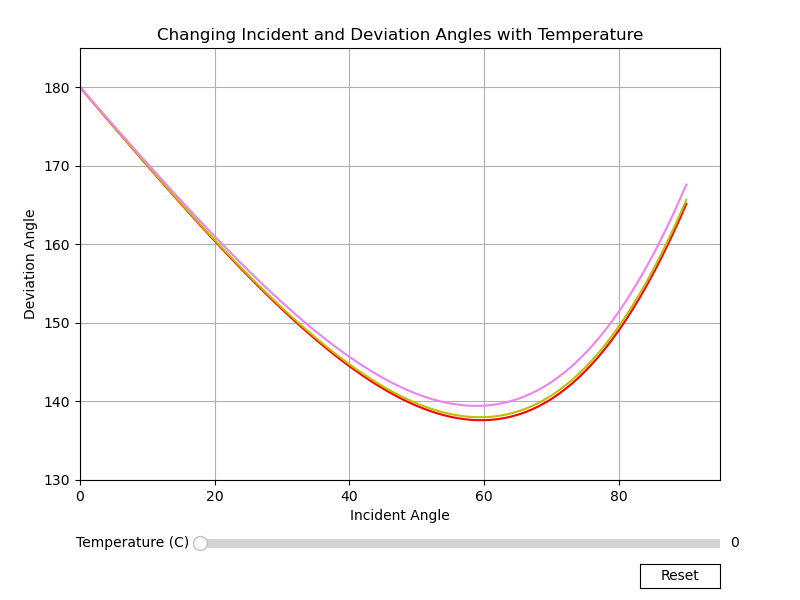

0

In [21]:
# Allows the plot to be updated without requiring the cell to be ran again
%matplotlib notebook 

# Making the plot
fig5, ax5 = plt.subplots(figsize=(8,6))
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.9, top=0.92) # Changes the position of the plot to allow for the slider to fit
ax5.grid(visible=True)
ax5.set_xlim(0, 95), ax5.set_ylim(130,185), ax5.set_title('Changing Incident and Deviation Angles with Temperature')
ax5.set_xlabel('Incident Angle'), ax5.set_ylabel('Deviation Angle')

# Initial plots for each wavelength of light
redplot, = ax5.plot(xs, Rainbow(xs,n3[0]).dev_angle(), color='red')
yellowplot, = ax5.plot(xs, Rainbow(xs,n2[0]).dev_angle(), color='y')
violetplot, = ax5.plot(xs, Rainbow(xs,n1[0]).dev_angle(), color='violet')

# Creating the slider
ax_slider = plt.axes([0.25, 0.08, 0.65, 0.03]) # A set of axis to put the slider onto
# Making a slider that goes between 0 and 90 with a step of 10, only taking integer values
temperature = Slider(ax_slider, 'Temperature (C)', 0.0, 90, 0, valstep=10, valfmt='%d')

# Function that is called when the slider is changed
def update(val):
    temp = int(temperature.val/10) # Uses the slider value to index the refractive index lists. e.g. 10C will index n[1]
    redplot.set_ydata(Rainbow(xs,n3[temp]).dev_angle()) # Changes the refractive index for the relevent temperature
    yellowplot.set_ydata(Rainbow(xs,n2[temp]).dev_angle()) # Changes the refractive index for the relevent temperature
    violetplot.set_ydata(Rainbow(xs,n1[temp]).dev_angle()) # Changes the refractive index for the relevent temperature
    
# Call the function when the slider is moved
temperature.on_changed(update)

# Making a reset button
reset_ax = plt.axes([0.8, 0.02, 0.1, 0.04]) # A set of axis to put the reset button onto
resetbutton = Button(reset_ax, 'Reset', color='white', hovercolor='skyblue')

# Fuction that is called when the reset button is pressed
def resetSlider(event):
    temperature.reset()
    
# Call the function when the reset button is clicked    
resetbutton.on_clicked(resetSlider)

In [23]:
# Changing incident and deviation angles with temperature. For violet light.
for i in n1:
    print(f'Incident angle = {Rainbow(0,i).dev_max()[0]} degrees. Min deviation angle = {Rainbow(0,i).dev_max()[1]} degrees')
# Values agree with the graph

Incident angle = 58.79616101852886 degrees. Min deviation angle = 139.437268779435 degrees
Incident angle = 58.800793669994604 degrees. Min deviation angle = 139.4260029951194 degrees
Incident angle = 58.83785906401506 degrees. Min deviation angle = 139.33577847306094 degrees
Incident angle = 58.89984453722709 degrees. Min deviation angle = 139.18454324815224 degrees
Incident angle = 58.98155891235235 degrees. Min deviation angle = 138.98450120486117 degrees
Incident angle = 59.08129014623674 degrees. Min deviation angle = 138.73931548917358 degrees
Incident angle = 59.1955883047403 degrees. Min deviation angle = 138.45691073173936 degrees
Incident angle = 59.32506591450217 degrees. Min deviation angle = 138.13517909963622 degrees
Incident angle = 59.466273850149314 degrees. Min deviation angle = 137.78208389138464 degrees
Incident angle = 59.618665570036335 degrees. Min deviation angle = 137.39841793395027 degrees


In [24]:
# Changing incident and deviation angles with temperature. For yellow light.
for i in n2:
    print(f'Incident angle = {Rainbow(0,i).dev_max()[0]} degrees. Min deviation angle = {Rainbow(0,i).dev_max()[1]} degrees')
# Values agree with the graph

Incident angle = 59.38374209668232 degrees. Min deviation angle = 137.98873859714215 degrees
Incident angle = 59.38664741546947 degrees. Min deviation angle = 137.98147729371524 degrees
Incident angle = 59.420352986478484 degrees. Min deviation angle = 137.8971648090079 degrees
Incident angle = 59.47790151464063 degrees. Min deviation angle = 137.75290519992058 degrees
Incident angle = 59.55466591936801 degrees. Min deviation angle = 137.55987559511104 degrees
Incident angle = 59.64776525249394 degrees. Min deviation angle = 137.32484710146613 degrees
Incident angle = 59.75548341141541 degrees. Min deviation angle = 137.05164645969396 degrees
Incident angle = 59.87610528784933 degrees. Min deviation angle = 136.74409988082488 degrees
Incident angle = 60.00791534144885 degrees. Min deviation angle = 136.4060639573411 degrees
Incident angle = 60.15094853278637 degrees. Min deviation angle = 136.03691638995292 degrees


In [25]:
# Changing incident and deviation angles with temperature. For red light.
for i in n3:
    print(f'Incident angle = {Rainbow(0,i).dev_max()[0]} degrees. Min deviation angle = {Rainbow(0,i).dev_max()[1]} degrees')
# Values agree with the graph

Incident angle = 59.53488962567475 degrees. Min deviation angle = 137.60967024190532 degrees
Incident angle = 59.542450849586835 degrees. Min deviation angle = 137.59063725900265 degrees
Incident angle = 59.580844346536686 degrees. Min deviation angle = 137.49389079510635 degrees
Incident angle = 59.6413628399955 degrees. Min deviation angle = 137.3410424113014 degrees
Incident angle = 59.72112154733088 degrees. Min deviation angle = 137.13894479152447 degrees
Incident angle = 59.81607313316522 degrees. Min deviation angle = 136.89737653059476 degrees
Incident angle = 59.92449907580055 degrees. Min deviation angle = 136.62022929441733 degrees
Incident angle = 60.0458483627257 degrees. Min deviation angle = 136.30840105580916 degrees
Incident angle = 60.17782056967872 degrees. Min deviation angle = 135.96729225770127 degrees
Incident angle = 60.32045024854228 degrees. Min deviation angle = 135.59630409107967 degrees


From the data it can be seen that the incident and deviation angles slightly change with temperature, causing a small change in the size of the rainbow, however the overall change can be seen as negligible as the change is so small.

### Sources

Values for the refractive indexes of water depending on wavelength of light: http://www.philiplaven.com/p20.html

Primary Bow Equations from: https://plus.maths.org/content/rainbows

Secondary Bow Equations from: https://teshenglin.github.io/post/2020_cal_s4p1/

Refractive Index Dependence On Temperature Data: https://aip.scitation.org/doi/pdf/10.1063/1.555743

Slider code adapted from: https://www.geeksforgeeks.org/matplotlib-slider-widget/

